In [88]:
import json
import networkx as nx
import matplotlib.pyplot as plt

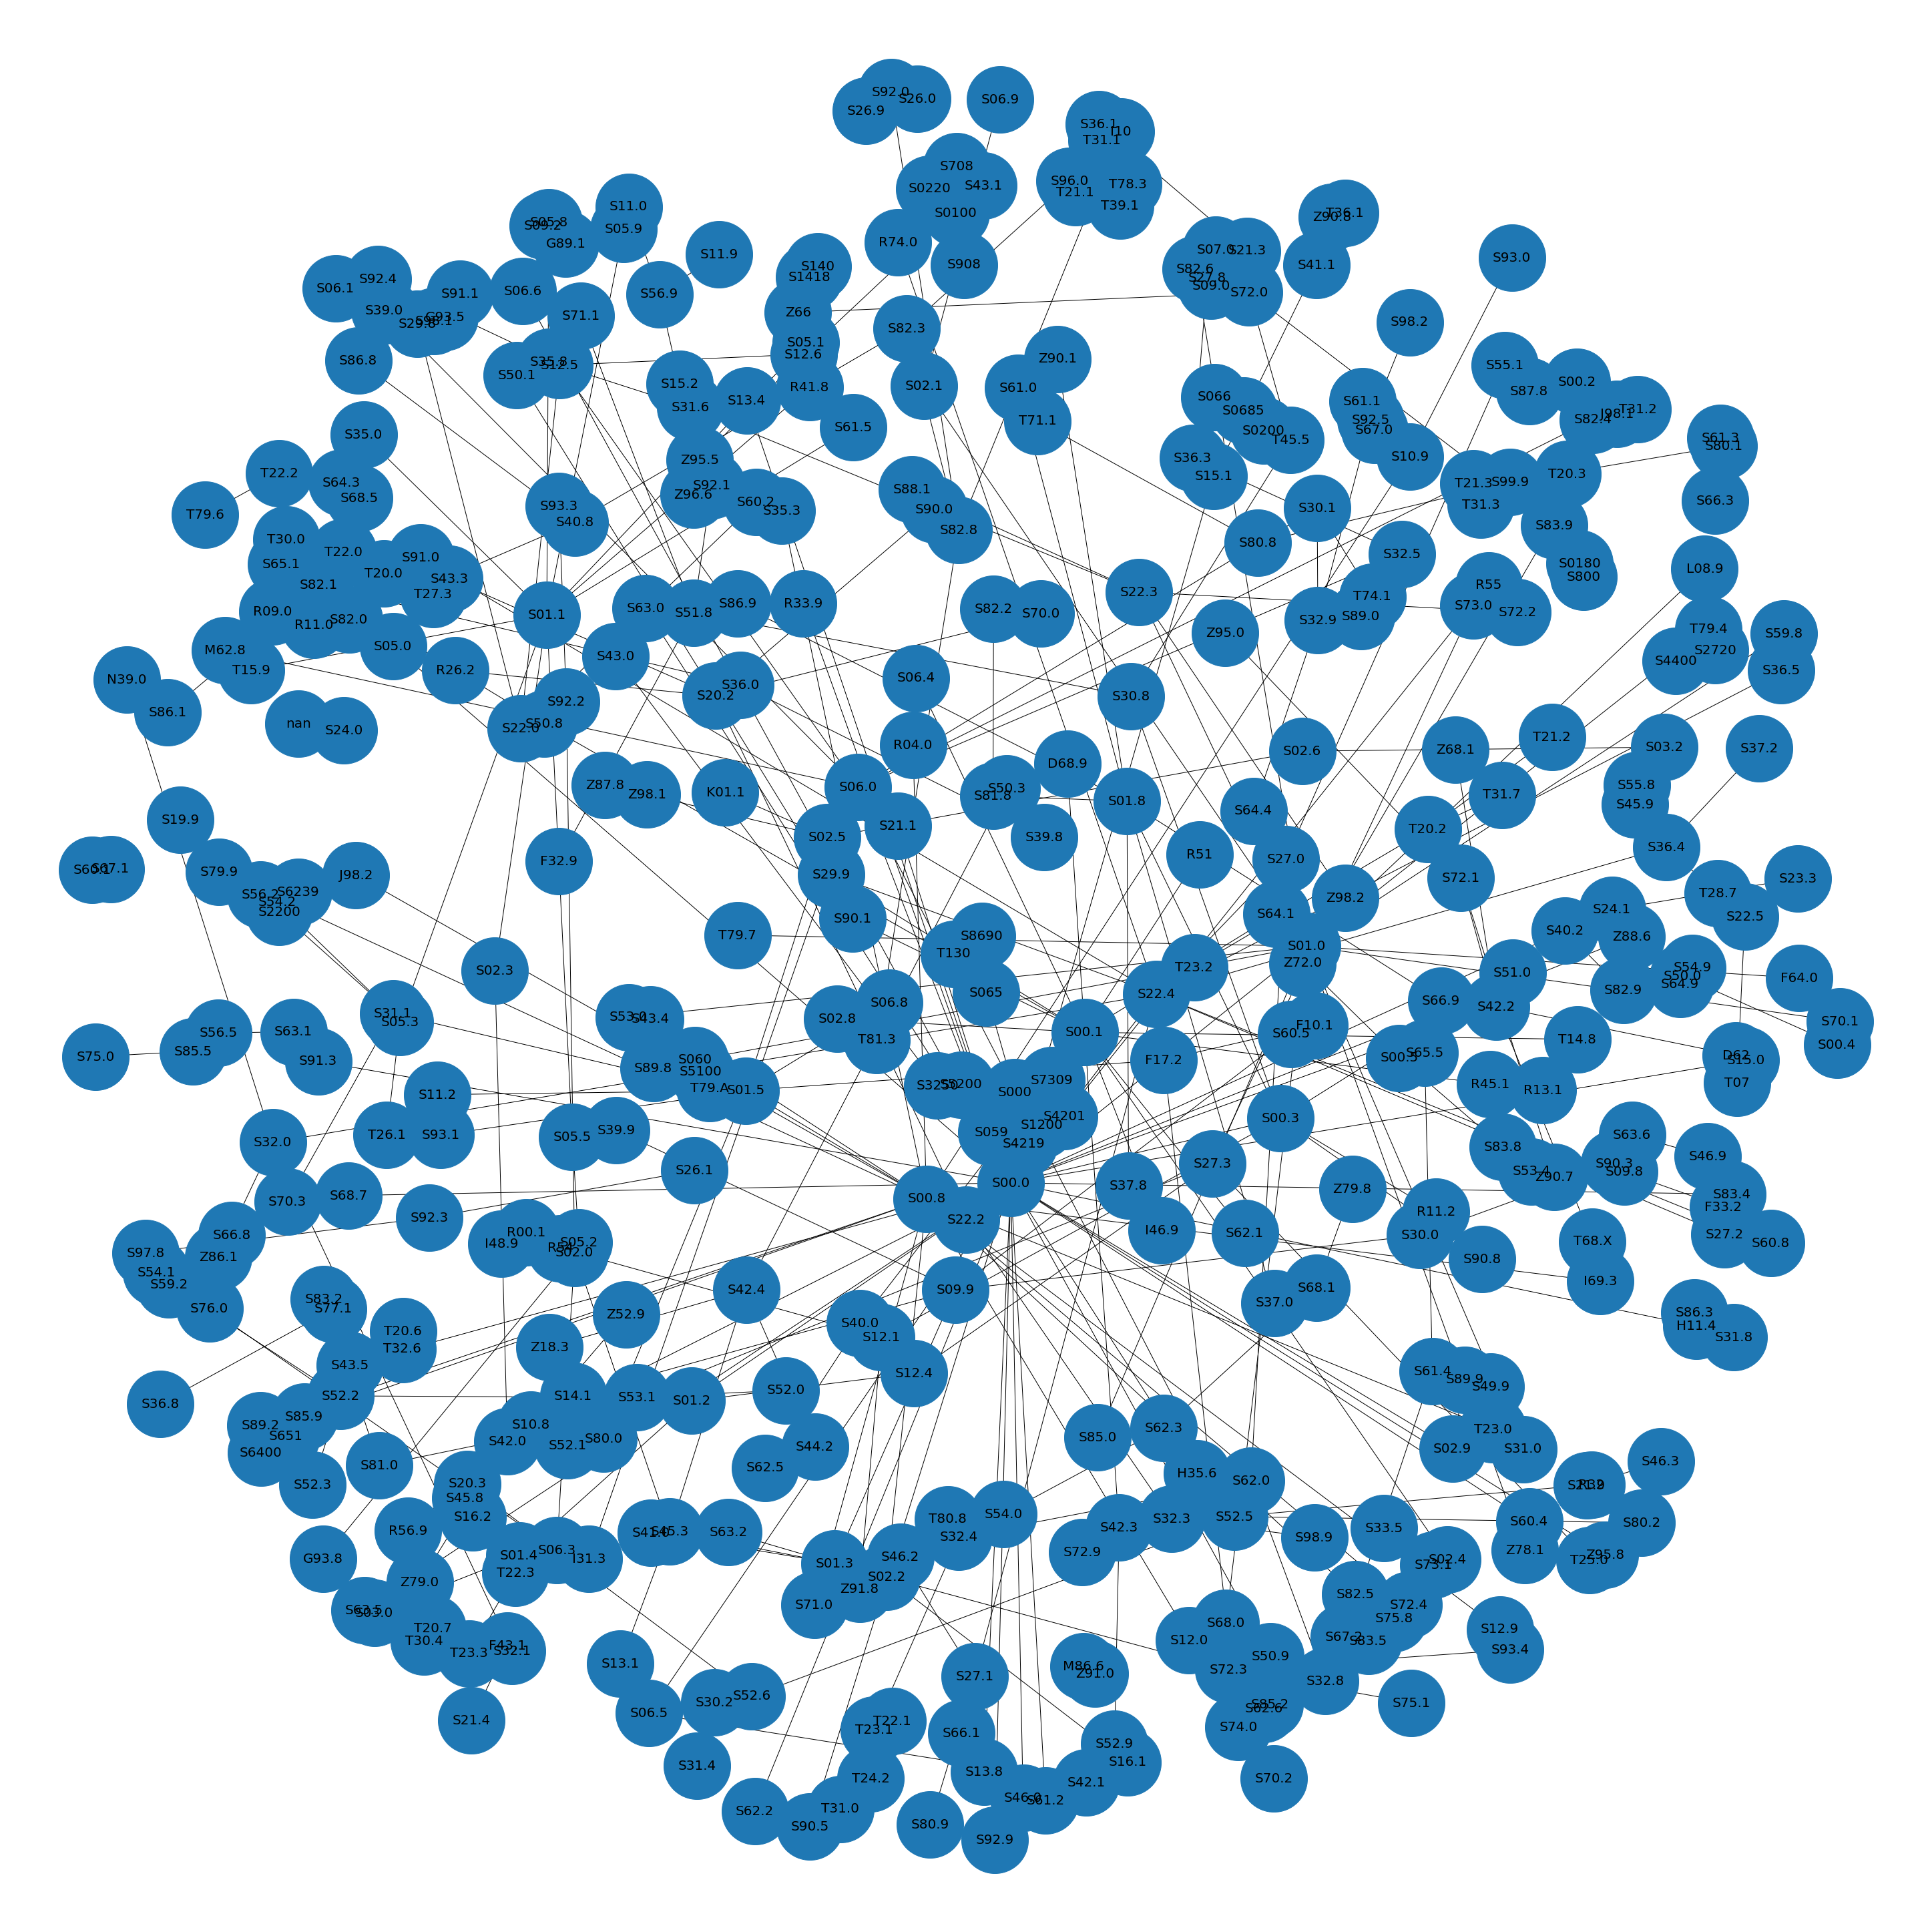

In [100]:
with open('adj_list.csv') as json_file:
    adj_list = json.load(json_file)
fig = plt.figure(1, figsize=(40, 40))
net = nx.Graph(adj_list)
nx.draw(net, node_size=10000,font_size=20, with_labels = True)

In [132]:
def findnodes(graph, source_node, degree, number, weight_thres):
    '''
    this function is to 
    - print out all of the nodes associated to the source node corresponding the number of connected edges
    - plot the subgraph from the overall graph containing the source_node

    input: 
    graph: networkx graph
    source_node: source node name
    degree: number of edges in between the source_node and the returned node
    number: number of nodes to be returned

    output: nodes which satisfy requirments as specified above

    note: essentially the idea is to extract a subgraph coming from that node
    the result of this could be further verified by using nx.descendants(graph, source_node)
    '''
    temp_graph = nx.Graph()
    result_nodes = {}
    all_nodes = [source_node]
    neighbors = [x for x in graph.neighbors(source_node)]
    weights = {}
    cur_num_edge = 1

    # iterate through current node in neighbor of the source node:

    # update node
    for cur_node in neighbors:
        weights[cur_node] = graph.get_edge_data(source_node,cur_node)['weight']
    # update result_nodes at number of edge = 1
    result_nodes[cur_num_edge] = [x for x in neighbors if weights[x]>weight_thres]
    # updates all node (all of the node which we have previously go through)
    all_nodes.extend(neighbors)
    # update neighbors information (which satistfy the weight threshold)
    neighbors = [x for x in neighbors if weights[x] > weight_thres]
    # iterate through the neighbors node, add edge to the output graph
    for ii in neighbors:
        temp_graph.add_edge(source_node, ii)

    # iterate through the neighbors of the neighbors
    while len(neighbors) != 0 and cur_num_edge <= degree:

        temp = []

        cur_num_edge += 1

        for node in neighbors:

            temp.extend([x for x in graph.neighbors(node) if x not in all_nodes])

            cur_weight = weights[node]
            for cur_node in graph.neighbors(node):
                if cur_node not in all_nodes:
                    weights[cur_node] = cur_weight * graph.get_edge_data(node, cur_node)['weight']
                    if weights[cur_node] > weight_thres:
                        temp_graph.add_edge(node, cur_node)
            all_nodes.extend(temp)
        if len(temp)!=0:
            result_nodes[cur_num_edge] = [x for x in temp if weights[x]>weight_thres]
        neighbors = [x for x in temp if weights[x]>weight_thres]
    

    #nx.draw(graph.subgraph(nx.shortest_path(graph.to_undirected(),source_node)),with_labels = True)
    

    return result_nodes, weights, temp_graph

In [134]:
k,m,g = findnodes( net, 'S20.2', 1, 5, 0.0000001)

In [135]:
k

{1: ['S50.1', 'S90.0', 'S70.0', 'S22.2', 'S90.1', 'S43.3', 'R26.2'],
 2: ['S32.3', 'S00.1']}

In [136]:
m

{'S50.1': 0.006802721088435374,
 'S90.0': 0.00684931506849315,
 'S70.0': 0.00558659217877095,
 'S22.2': 0.004524886877828055,
 'S90.1': 0.008064516129032258,
 'S43.3': 0.007692307692307693,
 'R26.2': 0.00819672131147541,
 'S32.3': 3.164256557921717e-05,
 'S00.1': 6.063545961678389e-05}

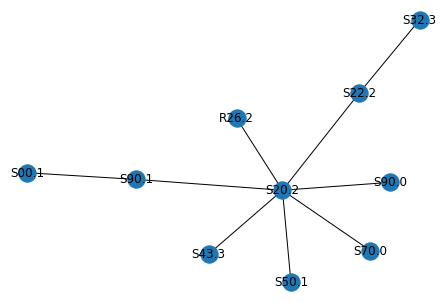

In [139]:
nx.draw(g, with_labels = True)